# ਕੋਵਿਡ-19 ਮਹਾਮਾਰੀ ਦਾ ਅੰਦਾਜ਼ਾ

## ਡਾਟਾ ਲੋਡ ਕਰਨਾ

ਅਸੀਂ ਕੋਵਿਡ-19 ਨਾਲ ਸੰਕਰਮਿਤ ਵਿਅਕਤੀਆਂ ਦੇ ਡਾਟਾ ਦੀ ਵਰਤੋਂ ਕਰਾਂਗੇ, ਜੋ [ਸੈਂਟਰ ਫਾਰ ਸਿਸਟਮਸ ਸਾਇੰਸ ਐਂਡ ਇੰਜੀਨੀਅਰਿੰਗ](https://systems.jhu.edu/) (CSSE) ਦੁਆਰਾ [ਜੌਨਸ ਹਾਪਕਿਨਸ ਯੂਨੀਵਰਸਿਟੀ](https://jhu.edu/) ਵਿੱਚ ਪ੍ਰਦਾਨ ਕੀਤਾ ਗਿਆ ਹੈ। ਡਾਟਾਸੈਟ [ਇਸ GitHub Repository](https://github.com/CSSEGISandData/COVID-19) ਵਿੱਚ ਉਪਲਬਧ ਹੈ।


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

ਅਸੀਂ ਸਭ ਤੋਂ ਹਾਲੀਆ ਡਾਟਾ ਸਿੱਧੇ GitHub ਤੋਂ `pd.read_csv` ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਲੋਡ ਕਰ ਸਕਦੇ ਹਾਂ। ਜੇ ਕਿਸੇ ਕਾਰਨ ਕਰਕੇ ਡਾਟਾ ਉਪਲਬਧ ਨਹੀਂ ਹੈ, ਤਾਂ ਤੁਸੀਂ ਹਮੇਸ਼ਾ `data` ਫੋਲਡਰ ਵਿੱਚ ਸਥਾਨਕ ਤੌਰ 'ਤੇ ਉਪਲਬਧ ਨਕਲ ਦੀ ਵਰਤੋਂ ਕਰ ਸਕਦੇ ਹੋ - ਸਿਰਫ ਹੇਠਾਂ ਦਿੱਤੀ ਲਾਈਨ ਨੂੰ ਅਨਕਮੈਂਟ ਕਰੋ ਜੋ `base_url` ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰਦੀ ਹੈ:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

ਅਸੀਂ ਵੇਖ ਸਕਦੇ ਹਾਂ ਕਿ ਟੇਬਲ ਦੀ ਹਰ ਕਤਾਰ ਹਰ ਦੇਸ਼ ਅਤੇ/ਜਾਂ ਸੂਬੇ ਲਈ ਸੰਕਰਮਿਤ ਵਿਅਕਤੀਆਂ ਦੀ ਗਿਣਤੀ ਨੂੰ ਪਰਿਭਾਸ਼ਿਤ ਕਰਦੀ ਹੈ, ਅਤੇ ਕਤਾਰਾਂ ਤਾਰੀਖਾਂ ਨਾਲ ਸਬੰਧਿਤ ਹਨ। ਹੋਰ ਡਾਟਾ, ਜਿਵੇਂ ਕਿ ਸਿਹਤਯਾਬ ਹੋਏ ਲੋਕਾਂ ਦੀ ਗਿਣਤੀ ਅਤੇ ਮੌਤਾਂ ਦੀ ਗਿਣਤੀ ਲਈ ਸਮਾਨ ਟੇਬਲਾਂ ਲੋਡ ਕੀਤੀਆਂ ਜਾ ਸਕਦੀਆਂ ਹਨ।


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## ਡਾਟਾ ਨੂੰ ਸਮਝਣਾ

ਉੱਪਰ ਦਿੱਤੀ ਟੇਬਲ ਵਿੱਚ ਸੂਬੇ ਵਾਲੇ ਕਾਲਮ ਦੀ ਭੂਮਿਕਾ ਸਪਸ਼ਟ ਨਹੀਂ ਹੈ। ਆਓ `Province/State` ਕਾਲਮ ਵਿੱਚ ਮੌਜੂਦ ਵੱਖ-ਵੱਖ ਮੁੱਲਾਂ ਨੂੰ ਵੇਖੀਏ:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## ਡਾਟਾ ਦੀ ਪੂਰਵ-ਪ੍ਰਕਿਰਿਆ 

ਅਸੀਂ ਦੇਸ਼ਾਂ ਨੂੰ ਹੋਰ ਖੇਤਰਾਂ ਵਿੱਚ ਵੰਡਣ ਵਿੱਚ ਦਿਲਚਸਪੀ ਨਹੀਂ ਰੱਖਦੇ, ਇਸ ਲਈ ਅਸੀਂ ਪਹਿਲਾਂ ਇਸ ਵੰਡ ਨੂੰ ਹਟਾ ਦੇਵਾਂਗੇ ਅਤੇ ਸਾਰੇ ਖੇਤਰਾਂ ਦੀ ਜਾਣਕਾਰੀ ਨੂੰ ਇਕੱਠਾ ਕਰਾਂਗੇ, ਤਾਂ ਜੋ ਸਾਰੇ ਦੇਸ਼ ਲਈ ਜਾਣਕਾਰੀ ਪ੍ਰਾਪਤ ਹੋ ਸਕੇ। ਇਹ `groupby` ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਕੀਤਾ ਜਾ ਸਕਦਾ ਹੈ:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

ਤੁਸੀਂ ਦੇਖ ਸਕਦੇ ਹੋ ਕਿ `groupby` ਦੇ ਇਸਤੇਮਾਲ ਕਰਕੇ ਸਾਰੇ ਡਾਟਾਫ੍ਰੇਮ ਹੁਣ Country/Region ਦੁਆਰਾ ਇੰਡੈਕਸ ਕੀਤੇ ਗਏ ਹਨ। ਅਸੀਂ ਇਸ ਤਰ੍ਹਾਂ `.loc` ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਕਿਸੇ ਖਾਸ ਦੇਸ਼ ਦਾ ਡਾਟਾ ਪ੍ਰਾਪਤ ਕਰ ਸਕਦੇ ਹਾਂ:|


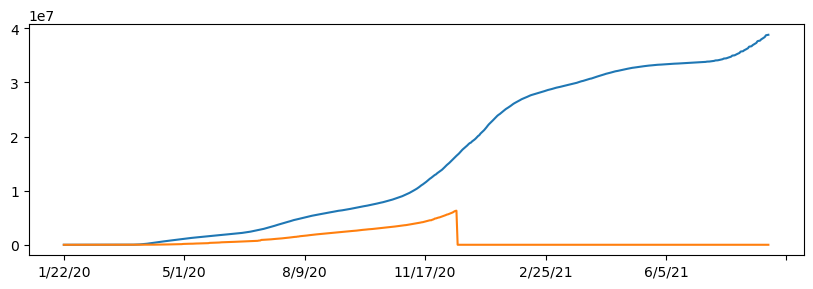

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

**ਨੋਟ** ਕਿ ਅਸੀਂ `[2:]` ਦਾ ਇਸਤੇਮਾਲ ਕਰਦੇ ਹਾਂ ਤਾਕਿ ਕਿਸੇ ਦੇਸ਼ ਦੇ ਭੂ-ਸਥਾਨ ਦੀ ਜਾਣਕਾਰੀ ਵਾਲੇ ਕ੍ਰਮ ਦੇ ਪਹਿਲੇ ਦੋ ਤੱਤਾਂ ਨੂੰ ਹਟਾਇਆ ਜਾ ਸਕੇ। ਅਸੀਂ ਉਹ ਦੋ ਕਾਲਮ ਪੂਰੀ ਤਰ੍ਹਾਂ ਹਟਾ ਵੀ ਸਕਦੇ ਹਾਂ:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## ਡਾਟਾ ਦੀ ਜਾਂਚ ਕਰਨਾ

ਹੁਣ ਆਓ ਕਿਸੇ ਖਾਸ ਦੇਸ਼ ਦੀ ਜਾਂਚ ਕਰੀਏ। ਆਓ ਇੱਕ ਫ੍ਰੇਮ ਬਣਾਈਏ ਜਿਸ ਵਿੱਚ ਮਿਤੀ ਦੇ ਅਨੁਸਾਰ ਸੂਚੀਬੱਧ ਸੰਕਰਮਣਾਂ ਦੇ ਡਾਟਾ ਨੂੰ ਸ਼ਾਮਲ ਕੀਤਾ ਗਿਆ ਹੈ:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

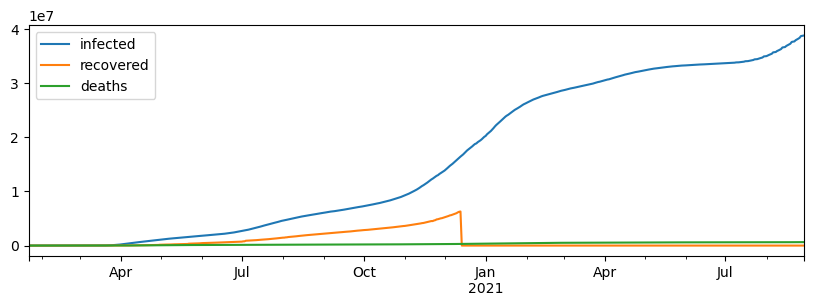

In [134]:
df.plot()
plt.show()

ਹੁਣ ਆਓ ਹਰ ਦਿਨ ਨਵੇਂ ਸੰਕਰਮਿਤ ਲੋਕਾਂ ਦੀ ਗਿਣਤੀ ਗਣਨਾ ਕਰੀਏ। ਇਹ ਸਾਨੂੰ ਮਹਾਮਾਰੀ ਦੇ ਅੱਗੇ ਵਧਣ ਦੀ ਗਤੀ ਦੇਖਣ ਦੀ ਆਗਿਆ ਦੇਵੇਗਾ। ਇਹ ਕਰਨ ਲਈ ਸਭ ਤੋਂ ਆਸਾਨ ਤਰੀਕਾ `diff` ਦੀ ਵਰਤੋਂ ਕਰਨਾ ਹੈ:


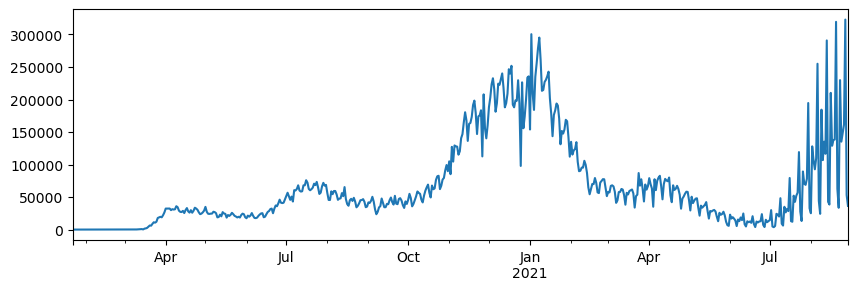

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

ਅਸੀਂ ਡਾਟਾ ਵਿੱਚ ਉੱਚੇ ਉਤਾਰ-ਚੜ੍ਹਾਵਾਂ ਦੇਖ ਸਕਦੇ ਹਾਂ। ਆਓ ਇੱਕ ਮਹੀਨੇ ਨੂੰ ਧਿਆਨ ਨਾਲ ਵੇਖੀਏ:


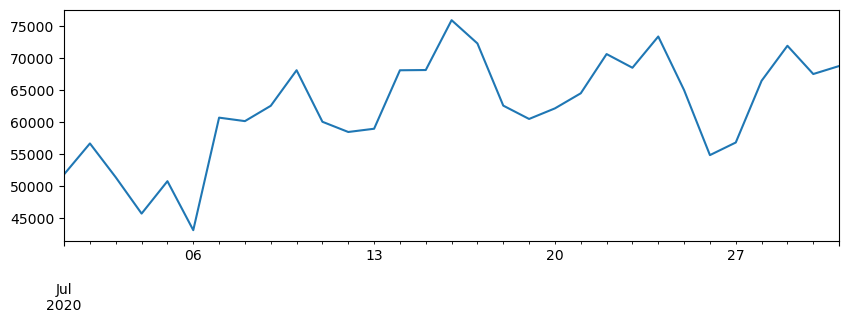

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

ਇਹ ਸਪਸ਼ਟ ਤੌਰ 'ਤੇ ਲੱਗਦਾ ਹੈ ਕਿ ਡਾਟਾ ਵਿੱਚ ਹਫ਼ਤਾਵਾਰੀ ਉਤਾਰ-ਚੜ੍ਹਾਵ ਹਨ। ਕਿਉਂਕਿ ਅਸੀਂ ਰੁਝਾਨਾਂ ਨੂੰ ਦੇਖਣਾ ਚਾਹੁੰਦੇ ਹਾਂ, ਇਸ ਲਈ ਕਰਵ ਨੂੰ ਸਮਤਲ ਬਣਾਉਣਾ ਤਰਕਸੰਗਤ ਹੈ, ਜੋ ਕਿ ਚਲ ਰਹੀ ਔਸਤ ਦੀ ਗਣਨਾ ਕਰਕੇ ਕੀਤਾ ਜਾ ਸਕਦਾ ਹੈ (ਅਰਥਾਤ ਹਰ ਦਿਨ ਲਈ ਅਸੀਂ ਪਿਛਲੇ ਕੁਝ ਦਿਨਾਂ ਦੇ ਔਸਤ ਮੁੱਲ ਦੀ ਗਣਨਾ ਕਰਾਂਗੇ):


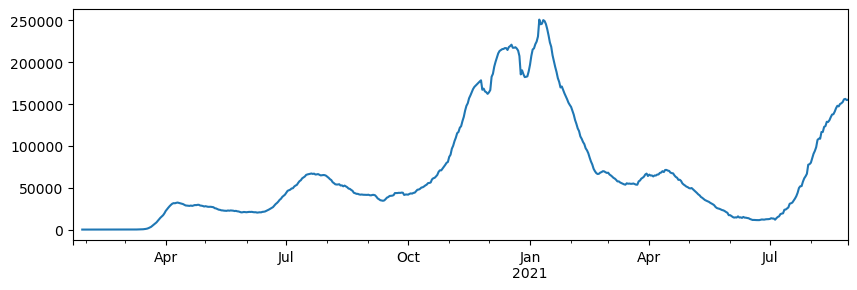

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

ਕਈ ਦੇਸ਼ਾਂ ਦੀ ਤੁਲਨਾ ਕਰਨ ਦੇ ਯੋਗ ਹੋਣ ਲਈ, ਅਸੀਂ ਦੇਸ਼ ਦੀ ਆਬਾਦੀ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਰੱਖਣਾ ਚਾਹੁੰਦੇ ਹਾਂ ਅਤੇ ਦੇਸ਼ ਦੀ ਆਬਾਦੀ ਦੇ ਪ੍ਰਤੀਸ਼ਤ ਦੇ ਰੂਪ ਵਿੱਚ ਸੰਕਰਮਿਤ ਵਿਅਕਤੀਆਂ ਦੀ ਤੁਲਨਾ ਕਰਦੇ ਹਾਂ। ਦੇਸ਼ ਦੀ ਆਬਾਦੀ ਪ੍ਰਾਪਤ ਕਰਨ ਲਈ, ਆਓ ਦੇਸ਼ਾਂ ਦੇ ਡੇਟਾਸੈਟ ਨੂੰ ਲੋਡ ਕਰੀਏ:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

ਕਿਉਂਕਿ ਇਸ ਡੇਟਾਸੈੱਟ ਵਿੱਚ ਦੇਸ਼ਾਂ ਅਤੇ ਪ੍ਰਾਂਤਾਂ ਦੋਵਾਂ ਬਾਰੇ ਜਾਣਕਾਰੀ ਸ਼ਾਮਲ ਹੈ, ਇਸ ਲਈ ਪੂਰੇ ਦੇਸ਼ ਦੀ ਆਬਾਦੀ ਪ੍ਰਾਪਤ ਕਰਨ ਲਈ ਸਾਨੂੰ ਥੋੜ੍ਹਾ ਚਤੁਰ ਹੋਣਾ ਪਵੇਗਾ:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

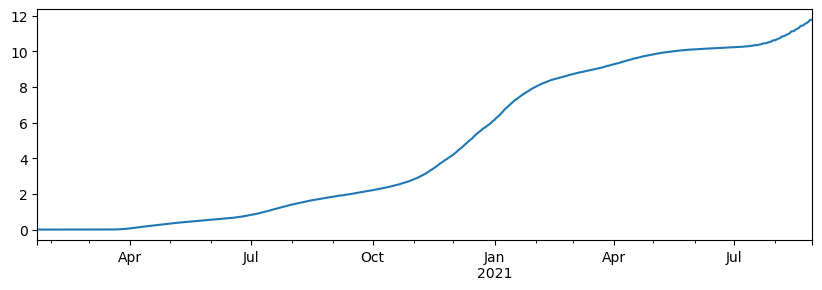

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ ਦੀ ਗਣਨਾ

ਬਿਮਾਰੀ ਕਿੰਨੀ ਸੰਕਰਮਕ ਹੈ ਇਹ ਦੇਖਣ ਲਈ, ਅਸੀਂ **ਮੂਲ ਪ੍ਰਜਨਨ ਸੰਖਿਆ** $R_0$ ਨੂੰ ਵੇਖਦੇ ਹਾਂ, ਜੋ ਦੱਸਦੀ ਹੈ ਕਿ ਇੱਕ ਸੰਕਰਮਿਤ ਵਿਅਕਤੀ ਹੋਰ ਕਿੰਨੇ ਲੋਕਾਂ ਨੂੰ ਸੰਕਰਮਿਤ ਕਰੇਗਾ। ਜਦੋਂ $R_0$ 1 ਤੋਂ ਵੱਧ ਹੁੰਦਾ ਹੈ, ਤਾਂ ਮਹਾਂਮਾਰੀ ਦੇ ਫੈਲਣ ਦੀ ਸੰਭਾਵਨਾ ਹੁੰਦੀ ਹੈ।

$R_0$ ਬਿਮਾਰੀ ਦੀ ਆਪਣੀ ਇੱਕ ਵਿਸ਼ੇਸ਼ਤਾ ਹੈ ਅਤੇ ਇਹ ਉਹ ਸੁਰੱਖਿਆਤਮਕ ਕਦਮਾਂ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਨਹੀਂ ਲੈਂਦਾ ਜੋ ਲੋਕ ਮਹਾਂਮਾਰੀ ਨੂੰ ਹੌਲੀ ਕਰਨ ਲਈ ਲੈ ਸਕਦੇ ਹਨ। ਮਹਾਂਮਾਰੀ ਦੇ ਵਿਕਾਸ ਦੌਰਾਨ, ਅਸੀਂ ਕਿਸੇ ਵੀ ਦਿੱਤੇ ਸਮੇਂ $t$ 'ਤੇ ਪ੍ਰਜਨਨ ਸੰਖਿਆ $R_t$ ਦਾ ਅੰਦਾਜ਼ਾ ਲਗਾ ਸਕਦੇ ਹਾਂ। ਇਹ ਸਾਬਤ ਹੋਇਆ ਹੈ ਕਿ ਇਸ ਸੰਖਿਆ ਦਾ ਅੰਦਾਜ਼ਾ ਲਗਭਗ 8 ਦਿਨਾਂ ਦੀ ਖਿੜਕੀ ਲੈ ਕੇ ਲਗਾਇਆ ਜਾ ਸਕਦਾ ਹੈ, ਅਤੇ ਇਸ ਤਰ੍ਹਾਂ ਗਣਨਾ ਕੀਤੀ ਜਾ ਸਕਦੀ ਹੈ:  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
ਜਿੱਥੇ $I_t$ ਦਿਨ $t$ 'ਤੇ ਨਵੇਂ ਸੰਕਰਮਿਤ ਵਿਅਕਤੀਆਂ ਦੀ ਗਿਣਤੀ ਹੈ।

ਆਓ ਆਪਣੇ ਮਹਾਂਮਾਰੀ ਡਾਟਾ ਲਈ $R_t$ ਦੀ ਗਣਨਾ ਕਰੀਏ। ਇਸ ਲਈ, ਅਸੀਂ 8 `ninfected` ਮੁੱਲਾਂ ਦੀ ਇੱਕ ਰੋਲਿੰਗ ਖਿੜਕੀ ਲਵਾਂਗੇ ਅਤੇ ਉਪਰ ਦਿੱਤੇ ਅਨੁਪਾਤ ਦੀ ਗਣਨਾ ਕਰਨ ਲਈ ਫੰਕਸ਼ਨ ਲਾਗੂ ਕਰਾਂਗੇ:


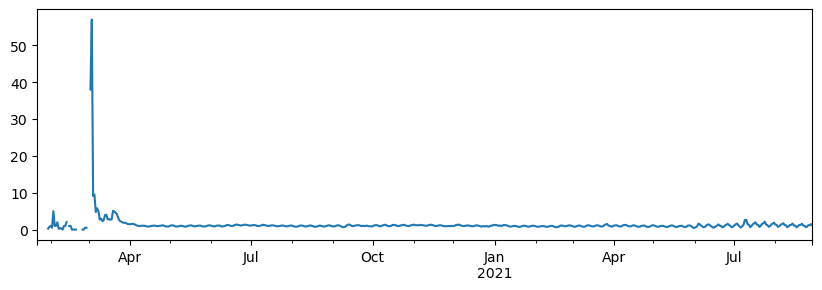

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

ਤੁਸੀਂ ਵੇਖ ਸਕਦੇ ਹੋ ਕਿ ਗ੍ਰਾਫ ਵਿੱਚ ਕੁਝ ਖਾਲੀ ਜਗ੍ਹਾਵਾਂ ਹਨ। ਇਹ ਜਾਂ ਤਾਂ `NaN` ਦੇ ਕਾਰਨ ਹੋ ਸਕਦੀਆਂ ਹਨ, ਜਾਂ ਫਿਰ ਡੇਟਾਸੈੱਟ ਵਿੱਚ `inf` ਮੁੱਲਾਂ ਦੇ ਮੌਜੂਦ ਹੋਣ ਕਰਕੇ। `inf` 0 ਨਾਲ ਭਾਗ ਦੇਣ ਕਾਰਨ ਆ ਸਕਦਾ ਹੈ, ਅਤੇ `NaN` ਇਸ ਗੱਲ ਦੀ ਨਿਸ਼ਾਨੀ ਹੋ ਸਕਦਾ ਹੈ ਕਿ ਡੇਟਾ ਗੁੰਮ ਹੈ ਜਾਂ ਨਤੀਜਾ ਗਣਨਾ ਕਰਨ ਲਈ ਕੋਈ ਡੇਟਾ ਉਪਲਬਧ ਨਹੀਂ ਹੈ (ਜਿਵੇਂ ਸਾਡੇ ਫਰੇਮ ਦੇ ਬਹੁਤ ਸ਼ੁਰੂ ਵਿੱਚ, ਜਿੱਥੇ 8 ਦੀ ਚੌੜਾਈ ਵਾਲੀ ਰੋਲਿੰਗ ਵਿੰਡੋ ਅਜੇ ਤਿਆਰ ਨਹੀਂ ਹੈ)। ਗ੍ਰਾਫ ਨੂੰ ਹੋਰ ਸੁੰਦਰ ਬਣਾਉਣ ਲਈ, ਸਾਨੂੰ ਉਹ ਮੁੱਲਾਂ `replace` ਅਤੇ `fillna` ਫੰਕਸ਼ਨ ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਭਰਨੇ ਪੈਣਗੇ।

ਆਓ ਮਹਾਮਾਰੀ ਦੇ ਸ਼ੁਰੂਆਤੀ ਦੌਰ ਨੂੰ ਹੋਰ ਵੇਖੀਏ। ਅਸੀਂ y-ਅਕਸ ਦੇ ਮੁੱਲਾਂ ਨੂੰ 6 ਤੋਂ ਹੇਠਾਂ ਹੀ ਦਿਖਾਉਣ ਲਈ ਸੀਮਿਤ ਕਰਾਂਗੇ, ਤਾਂ ਜੋ ਗ੍ਰਾਫ ਨੂੰ ਵਧੀਆ ਤਰੀਕੇ ਨਾਲ ਦੇਖ ਸਕੀਏ, ਅਤੇ 1 'ਤੇ ਇੱਕ ਹੋਰਿਜ਼ਾਂਟਲ ਲਾਈਨ ਖਿੱਚਾਂਗੇ।


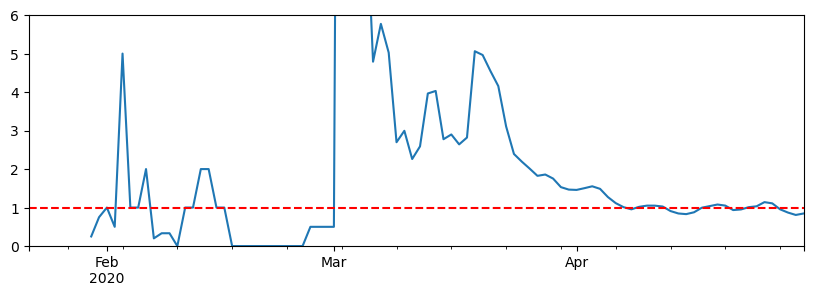

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

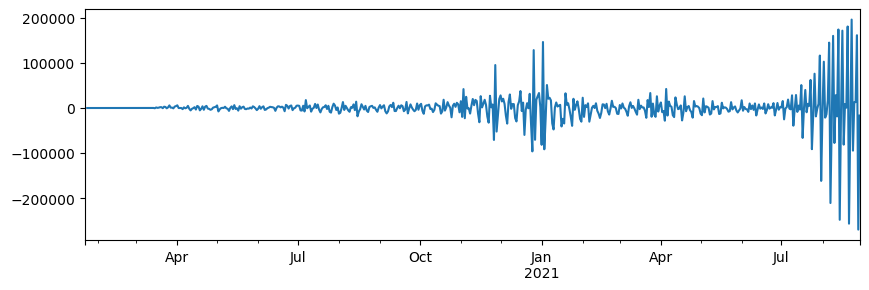

In [143]:
df['ninfected'].diff().plot()
plt.show()

ਇਹ ਗੱਲ ਧਿਆਨ ਵਿੱਚ ਰੱਖਦੇ ਹੋਏ ਕਿ ਰਿਪੋਰਟਿੰਗ ਕਾਰਨ ਡਾਟਾ ਵਿੱਚ ਬਹੁਤ ਸਾਰੀਆਂ ਉਤਾਰ-ਚੜ੍ਹਾਵਾਂ ਹੁੰਦੀਆਂ ਹਨ, ਸਮੁੱਚੀ ਤਸਵੀਰ ਪ੍ਰਾਪਤ ਕਰਨ ਲਈ ਰੋਲਿੰਗ ਐਵਰੇਜ ਚਲਾ ਕੇ ਵਕਰ ਨੂੰ ਸਮਤਲ ਕਰਨਾ ਸਮਝਦਾਰੀ ਹੈ। ਆਓ ਫਿਰ ਤੋਂ ਮਹਾਮਾਰੀ ਦੇ ਪਹਿਲੇ ਮਹੀਨਿਆਂ 'ਤੇ ਧਿਆਨ ਕੇਂਦਰਿਤ ਕਰੀਏ:


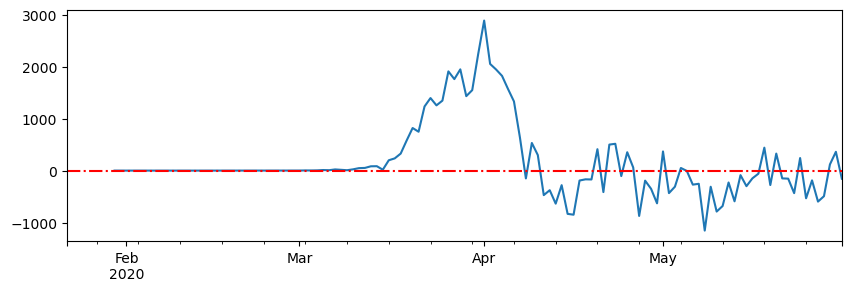

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## ਚੁਣੌਤੀ

ਹੁਣ ਸਮਾਂ ਹੈ ਕਿ ਤੁਸੀਂ ਕੋਡ ਅਤੇ ਡਾਟਾ ਨਾਲ ਹੋਰ ਖੇਡੋ! ਇੱਥੇ ਕੁਝ ਸੁਝਾਅ ਹਨ ਜਿਨ੍ਹਾਂ ਨਾਲ ਤੁਸੀਂ ਪ੍ਰਯੋਗ ਕਰ ਸਕਦੇ ਹੋ:
* ਵੱਖ-ਵੱਖ ਦੇਸ਼ਾਂ ਵਿੱਚ ਮਹਾਮਾਰੀ ਦੇ ਫੈਲਾਅ ਨੂੰ ਦੇਖੋ।
* ਕਈ ਦੇਸ਼ਾਂ ਲਈ $R_t$ ਗ੍ਰਾਫ ਇੱਕੋ ਪਲਾਟ 'ਤੇ ਤੁਲਨਾ ਲਈ ਬਣਾਓ, ਜਾਂ ਕਈ ਪਲਾਟਾਂ ਨੂੰ ਸਾਈਡ-ਬਾਈ-ਸਾਈਡ ਬਣਾਓ।
* ਦੇਖੋ ਕਿ ਮੌਤਾਂ ਅਤੇ ਸਿਹਤਯਾਬੀਆਂ ਦੀ ਗਿਣਤੀ ਦਾ ਸੰਕਰਮਿਤ ਕੇਸਾਂ ਦੀ ਗਿਣਤੀ ਨਾਲ ਕਿਵੇਂ ਸੰਬੰਧ ਹੈ।
* ਕੋਸ਼ਿਸ਼ ਕਰੋ ਪਤਾ ਲਗਾਉਣ ਦੀ ਕਿ ਇੱਕ ਆਮ ਬਿਮਾਰੀ ਕਿੰਨੇ ਸਮੇਂ ਤੱਕ ਰਹਿੰਦੀ ਹੈ, ਸੰਕਰਮਣ ਦਰ ਅਤੇ ਮੌਤ ਦਰ ਨੂੰ ਵਿਜੁਅਲ ਤੌਰ 'ਤੇ ਜੋੜ ਕੇ ਅਤੇ ਕੁਝ ਅਸਧਾਰਨਤਾਵਾਂ ਨੂੰ ਵੇਖ ਕੇ। ਇਸ ਲਈ ਤੁਹਾਨੂੰ ਵੱਖ-ਵੱਖ ਦੇਸ਼ਾਂ ਨੂੰ ਦੇਖਣ ਦੀ ਲੋੜ ਹੋ ਸਕਦੀ ਹੈ।
* ਮੌਤ ਦਰ ਦੀ ਗਣਨਾ ਕਰੋ ਅਤੇ ਦੇਖੋ ਕਿ ਇਹ ਸਮੇਂ ਦੇ ਨਾਲ ਕਿਵੇਂ ਬਦਲਦੀ ਹੈ। ਤੁਸੀਂ ਬਿਮਾਰੀ ਦੇ ਦਿਨਾਂ ਦੀ ਲੰਬਾਈ ਨੂੰ ਧਿਆਨ ਵਿੱਚ ਰੱਖਣਾ ਚਾਹੋਗੇ ਤਾਂ ਜੋ ਗਣਨਾਵਾਂ ਕਰਨ ਤੋਂ ਪਹਿਲਾਂ ਇੱਕ ਸਮੇਂ ਦੀ ਲੜੀ ਨੂੰ ਅੱਗੇ ਪਿੱਛੇ ਕਰ ਸਕੋ।


## ਹਵਾਲੇ

ਤੁਸੀਂ COVID ਮਹਾਮਾਰੀ ਦੇ ਫੈਲਾਅ ਦੇ ਅਧਿਐਨ ਲਈ ਹੇਠਾਂ ਦਿੱਤੀਆਂ ਪ੍ਰਕਾਸ਼ਨਾਂ ਨੂੰ ਦੇਖ ਸਕਦੇ ਹੋ:
* [COVID ਮਹਾਮਾਰੀ ਦੌਰਾਨ Rt ਅਨੁਮਾਨ ਲਈ ਸਲਾਈਡਿੰਗ SIR ਮਾਡਲ](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), ਬਲੌਗ ਪੋਸਟ [ਦਿਮਿਤਰੀ ਸੋਸ਼ਨਿਕੋਵ](http://soshnikov.com) ਵੱਲੋਂ
* T.Petrova, D.Soshnikov, A.Grunin. [ਗਲੋਬਲ COVID-19 ਮਹਾਮਾਰੀ ਲਈ ਸਮੇਂ-ਨਿਰਭਰ ਪ੍ਰਜਨਨ ਸੰਖਿਆ ਦਾ ਅਨੁਮਾਨ](https://www.preprints.org/manuscript/202006.0289/v1). *ਪ੍ਰੀਪ੍ਰਿੰਟਸ* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [GitHub 'ਤੇ ਉਪਰੋਕਤ ਪੇਪਰ ਲਈ ਕੋਡ](https://github.com/shwars/SlidingSIR)



---

**ਅਸਵੀਕਰਤੀ**:  
ਇਹ ਦਸਤਾਵੇਜ਼ AI ਅਨੁਵਾਦ ਸੇਵਾ [Co-op Translator](https://github.com/Azure/co-op-translator) ਦੀ ਵਰਤੋਂ ਕਰਕੇ ਅਨੁਵਾਦ ਕੀਤਾ ਗਿਆ ਹੈ। ਜਦੋਂ ਕਿ ਅਸੀਂ ਸਹੀ ਹੋਣ ਦਾ ਯਤਨ ਕਰਦੇ ਹਾਂ, ਕਿਰਪਾ ਕਰਕੇ ਧਿਆਨ ਦਿਓ ਕਿ ਸਵੈਚਾਲਿਤ ਅਨੁਵਾਦਾਂ ਵਿੱਚ ਗਲਤੀਆਂ ਜਾਂ ਅਸੁੱਤੀਆਂ ਹੋ ਸਕਦੀਆਂ ਹਨ। ਇਸ ਦੀ ਮੂਲ ਭਾਸ਼ਾ ਵਿੱਚ ਮੌਜੂਦ ਮੂਲ ਦਸਤਾਵੇਜ਼ ਨੂੰ ਪ੍ਰਮਾਣਿਕ ਸਰੋਤ ਮੰਨਿਆ ਜਾਣਾ ਚਾਹੀਦਾ ਹੈ। ਮਹੱਤਵਪੂਰਨ ਜਾਣਕਾਰੀ ਲਈ, ਪੇਸ਼ੇਵਰ ਮਨੁੱਖੀ ਅਨੁਵਾਦ ਦੀ ਸਿਫਾਰਸ਼ ਕੀਤੀ ਜਾਂਦੀ ਹੈ। ਇਸ ਅਨੁਵਾਦ ਦੇ ਪ੍ਰਯੋਗ ਤੋਂ ਪੈਦਾ ਹੋਣ ਵਾਲੇ ਕਿਸੇ ਵੀ ਗਲਤਫਹਿਮੀ ਜਾਂ ਗਲਤ ਵਿਆਖਿਆ ਲਈ ਅਸੀਂ ਜ਼ਿੰਮੇਵਾਰ ਨਹੀਂ ਹਾਂ।  
